Привет, меня зовут Артем Хуршудов. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

<font color='green'><b>Полезные (и просто интересные) материалы:</b></font> \
Для работы с текстами используют и другие подходы. Например, сейчас активно используются RNN (LSTM) и трансформеры (BERT и другие с улицы Сезам, например, ELMO). НО! Они не являются панацеей, не всегда они нужны, так как и TF-IDF или Word2Vec + модели из классического ML тоже могут справляться. \
BERT тяжелый, существует много его вариаций для разных задач, есть готовые модели, есть надстройки над библиотекой transformers. Если, обучать BERT на GPU (можно в Google Colab или Kaggle), то должно быть побыстрее.\
https://huggingface.co/transformers/model_doc/bert.html \
https://t.me/renat_alimbekov \
https://colah.github.io/posts/2015-08-Understanding-LSTMs/ - Про LSTM \
https://web.stanford.edu/~jurafsky/slp3/10.pdf - про энкодер-декодер модели, этеншены\
https://pytorch.org/tutorials/beginner/transformer_tutorial.html - официальный гайд
по трансформеру от создателей pytorch\
https://transformer.huggingface.co/ - поболтать с трансформером \
Библиотеки: allennlp, fairseq, transformers, tensorflow-text — множествореализованных
методов для трансформеров методов NLP \
Word2Vec https://radimrehurek.com/gensim/models/word2vec.html 

<font color='green'>Пример BERT с GPU:
```python
%%time
from tqdm import notebook
batch_size = 2 # для примера возьмем такой батч, где будет всего две строки датасета
embeddings = [] 
for i in notebook.tqdm(range(input_ids.shape[0] // batch_size)):
        batch = torch.LongTensor(input_ids[batch_size*i:batch_size*(i+1)]).cuda() # закидываем тензор на GPU
        attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)]).cuda()
        
        with torch.no_grad():
            model.cuda()
            batch_embeddings = model(batch, attention_mask=attention_mask_batch)
        
        embeddings.append(batch_embeddings[0][:,0,:].cpu().numpy()) # перевод обратно на проц, чтобы в нумпай кинуть
        del batch
        del attention_mask_batch
        del batch_embeddings
        
features = np.concatenate(embeddings) 
```
Можно сделать предварительную проверку на наличие GPU.\
Например, так: ```device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")```\
Тогда вместо .cuda() нужно писать .to(device)

Если понравилась работа с текстами, то можешь посмотреть очень интересный (но очень-очень сложный) курс лекций: https://github.com/yandexdataschool/nlp_course .
</font>

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
* Радует, что ноутбук хорошо структурирован. Приятно проверять такие работы.
* Отлично, что стоп-слова были исключены при векторизации!
* Работа получилась отличной, тебе удалось добиться достаточно хорошего качества. Поздравляю!
* Проект может быть зачтен, но я его отправлю назад, чтобы у тебя была возможность задать вопросы и внести правки, при желании. Однако, ты можешь просто вернуть проект в таком же виде и я его зачту.

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Изначально я хотел сделать проект через BERT - но моя домашняя "печатная машинка" не вытянула :с
</div>

### <font color='orange'>Общее впечатление (ревью 2)</font>
* Проект зачтен!
* Удачи в дальнейшем обучении и следующих работах!

<div class="alert alert-block alert-info">
<b>Совет (ревью 2): </b> 

1. Внутри кросс-валидации происзодит разбиение переданной в нее выборку на части (треин и валидация). Подробнее тут: https://codecamp.ru/blog/cross-validation-k-fold/
2. Мы хотим, чтобы при подборе параметров внутри кросс-валидации векторизатор не обучался на валидации. Для этого нам нужно его обучать каждый раз только на треине (внутри кросс-валидации). Для этого и нужен пайплайн, чтобы внутри кросс-валидации обучалась не только модель, но и векторизатор. 

Вот такой пайплайн нужно передать в кросс-валидацию:  
`pipe_lr = Pipeline([(‘vect’, CountVectorizer()),
 (‘tfidf’, TfidfTransformer()),
 (‘model’, LogisticRegression())])`
    
Тут подробнее про то, как тюнить параметры у пайплайна: https://stackoverflow.com/questions/51606341/hyper-parameter-tuning-on-pipeline-object
</div>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Общее-впечатление" data-toc-modified-id="Общее-впечатление-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span><font color="orange">Общее впечатление</font></a></span></li><li><span><a href="#Общее-впечатление-(ревью-2)" data-toc-modified-id="Общее-впечатление-(ревью-2)-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span><font color="orange">Общее впечатление (ревью 2)</font></a></span></li></ul></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Random-Forest-Classifier" data-toc-modified-id="Random-Forest-Classifier-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Random Forest Classifier</a></span></li><li><span><a href="#SGD-Classifier" data-toc-modified-id="SGD-Classifier-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>SGD Classifier</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

In [20]:
import pandas as pd
import numpy as np 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
#добавил импорт пайплайна

import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords as nltk_stopwords
from nltk.stem import WordNetLemmatizer 

import re

RANDOM_STATE = 131296

nltk.download('wordnet')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что все импорты собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

In [2]:
def data_analyze(data):
    rows_count, columns_count = data.shape
    print('Количество стобцов:', columns_count)
    print('Количество строк:', rows_count)
    display(data.head(5))
    display(data.describe())
    data.info()

In [3]:
def lemmatize(text): 
    tokens = nltk.word_tokenize(text)
    return ' '.join([lemmatizer.lemmatize(token) for token in tokens])

In [4]:
def clear_text(text):
    return ' '.join(re.sub(r'[^a-zA-Z ]', ' ', text).split())

<div class="alert alert-block alert-success">
<b>Успех:</b> Очистка и лемматизация были определены верно, молодец!
</div>

## Подготовка

Загрузим и проанализируем предоставленные данные.

In [5]:
data = pd.read_csv('/datasets/toxic_comments.csv')

In [6]:
data_analyze(data)

Количество стобцов: 3
Количество строк: 159292


,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0


,Unnamed: 0,toxic
count,159292.000000,159292.000000
mean,79725.697242,0.101612
std,46028.837471,0.302139
min,0.000000,0.000000
25%,39872.750000,0.000000
50%,79721.500000,0.000000
75%,119573.250000,0.000000
max,159450.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


В данных есть столбец "Unnamed: 0", который явно дублирует индекс и является посторонним - удалим его и проверим данные ещё раз.

In [7]:
data = data.drop(columns='Unnamed: 0')

In [8]:
data_analyze(data)

Количество стобцов: 2
Количество строк: 159292


,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


,toxic
count,159292.000000
mean,0.101612
std,0.302139
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


По среднему значению столбца "Toxic" (0 - комментарий "не токсичный", 1 - комментарий "токсичный") видно, что "токсичных" комментариев значительно меньше, чем обычных - около 10% от общей массы. Построим график "токсичности" комментариев.

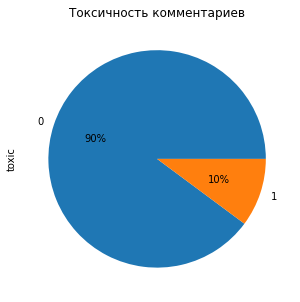

In [9]:
data['toxic'].value_counts().plot(kind='pie', 
                                  figsize=(10, 5), 
                                  legend=False, 
                                  title='Токсичность комментариев',
                                  autopct='%1.0f%%'
                                 )
plt.show()

Так и есть - в общей массе комментариев примерно 10% "токсичных" - наблюдаем дисбаланс классов. Для его учёта при обучении моделей будем использовать баланс классов и стратифицированные выборки.

Проведём отчистку и лемматизацию текстов.

<div class="alert alert-block alert-success">
<b>Успех:</b> Данные загружены корреткно. Радует, что баланс классов был изучен.
</div>

In [10]:
corpus = []
for comment in data['text']: 
    corpus.append(lemmatize(clear_text(comment)))

Сравним для наглядности исходный и подготовленный комментарий.

In [11]:
print(data['text'][0])
print()
print(corpus[0])

Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27

Explanation Why the edits made under my username Hardcore Metallica Fan were reverted They weren t vandalism just closure on some GAs after I voted at New York Dolls FAC And please don t remove the template from the talk page since I m retired now


Выделим признак - корпус подготовленных (отчищенныз и лемматизированных) комментариев, и целевой признак - "токсичность".

In [12]:
features = corpus
target = data['toxic']

Выделим стратифицированные тренировочную и тестовую выборки.

In [13]:
features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            test_size=0.2, 
                                                                            random_state=RANDOM_STATE,
                                                                            stratify=target)

Вычислим TF-IDF для тренировочной и тестовой выборке.

In [14]:
stopwords = set(nltk_stopwords.words('english'))
count_tf_idf = TfidfVectorizer(stop_words=stopwords)

features_train = count_tf_idf.fit_transform(features_train)
features_test = count_tf_idf.transform(features_test)

<div class="alert alert-block alert-success">
<b>Успех:</b> Разбиение было сделано верно. Отлично, что векторизатор был обучен только на тренировочной части данных.
</div>

## Обучение

### Logistic Regression

In [21]:
%%time
pipe_lr = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('clf', LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', class_weight='balanced'))])


model = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', class_weight='balanced')

param_grid = {
    'clf__C': [0.01, 0.1, 1, 10],
    'clf__max_iter': range(100, 1001, 100),
}

search_lr = GridSearchCV(pipe_lr, param_grid, cv=5, verbose=False, scoring='f1')
search_lr.fit(features_train, target_train)

print(search_lr.best_score_)

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/opt/conda/lib/python3.9/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/opt/conda/lib/python3.

AttributeError: lower not found

<div class="alert alert-block alert-info">
<b>Совет: </b> Напомню, что внутри кросс-валидации происходит разбиение выборки на треин и валидацию. Однако, в таком случае векторизатор обучен на всей выборке, а это не совсем корректно. Для избежания такого эффекта можно использовать <a href="https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html">пайплайн</a>. <a href="https://medium.com/analytics-vidhya/ml-pipelines-using-scikit-learn-and-gridsearchcv-fe605a7f9e05">Тут</a> есть пример.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Не очень понимаю в данном случае как сформировать пайплайн :с
</div>

### Random Forest Classifier

In [22]:
%%time
pipe_rf = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('clf', RandomForestClassifier(random_state=RANDOM_STATE, class_weight='balanced'))])

param_grid = {'clf__max_depth': [2, 6, 10],
              'clf__n_estimators': [10, 30, 50]
             }

search_rf = GridSearchCV(pipe_rf, param_grid, cv=5, verbose=False, scoring='f1')
search_rf.fit(features_train, target_train)

print(search_rf.best_score_)

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/opt/conda/lib/python3.9/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/opt/conda/lib/python3.

AttributeError: lower not found

### SGD Classifier

In [17]:
%%time
pipe_SGDC = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('clf', SGDClassifier(random_state=RANDOM_STATE, class_weight='balanced'))])

param_grid = {'clf__alpha': [0.0001, 0.001],
              'clf__max_iter': [750, 1000, 1250]
             }

search_SGDC = GridSearchCV(pipe_SGDC, param_grid, cv=5, verbose=False, scoring='f1')
search_SGDC.fit(features_train, target_train)

print(search_SGDC.best_score_)

NameError: name 'CountVectorizer' is not defined

<div class="alert alert-block alert-success">
<b>Успех:</b> Молодец, что попробовал разные модели в этом шаге!
</div>

## Выводы

На тренировочной выборке при кросс-валидации лучшее значение F1 меры показала модель LogisticRegression (0.763) - проверим эту модель на тестовой выборке.

In [18]:
model = search_lr.best_estimator_

model.fit(features_train, target_train)
predictions = model.predict(features_test)

print(f1_score(target_test, predictions))

NameError: name 'search_lr' is not defined

На тестовой выборке лучшая полученная модель показала значение F1 меры равное 0.764, что больше требуемого минимального порога 0.75.

Данная модель удовлетворяет поставленным требованиям.

<div class="alert alert-block alert-success">
<b>Успех:</b> Тестирование было сделано правильно!
</div>

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Модели обучены
- [x]  Значение метрики *F1* не меньше 0.75
- [x]  Выводы написаны